In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.decomposition import PCA 
from sklearn import preprocessing 
stocks = pd.read_csv(r'C:\Users\Nicholas Jones\Desktop\PythonStuff\stocks.csv')

In [50]:
#No duplicates
stocks.drop_duplicates()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [51]:
#No Nulls
stocks.columns.isna()

array([False, False, False, False, False, False, False, False])

In [52]:
#Scale
#StandardScaler().fit_transform(data.T)
stockz = stocks[['Open','High','Low','Close','Adj Close','Volume']]
stockz
skale = preprocessing.scale(stockz.T)

In [53]:
#create PCA
pca = PCA()

In [54]:
#lOAD SCORES
pca.fit(skale)

PCA()

In [55]:
#generate coordinates
pca_data = pca.transform(skale)


In [56]:
perc = np.round(pca.explained_variance_ratio_* 100, decimals=1)

In [57]:
#Labels
Labels = ["PC"+str(x) for x in range(1, len(perc)+1)]

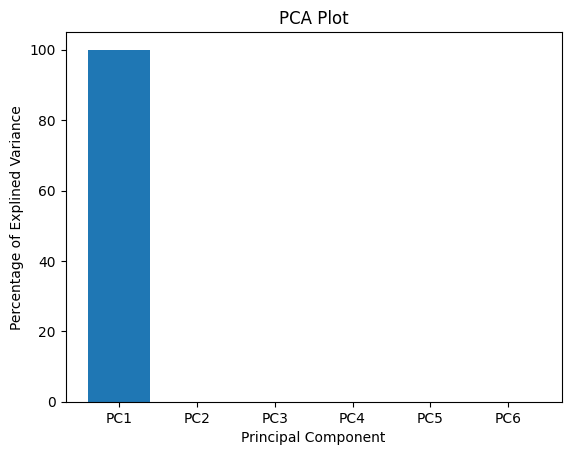

In [58]:
#Create A Bar plot
plt.bar(x = range(1, len(perc)+1), height = perc, tick_label = Labels)
plt.ylabel("Percentage of Explined Variance")
plt.xlabel("Principal Component")
plt.title("PCA Plot")
plt.show()

In [59]:
# new dataframe
pca_df = pd.DataFrame(pca_data, columns = Labels)


TypeError: 'numpy.ndarray' object is not callable

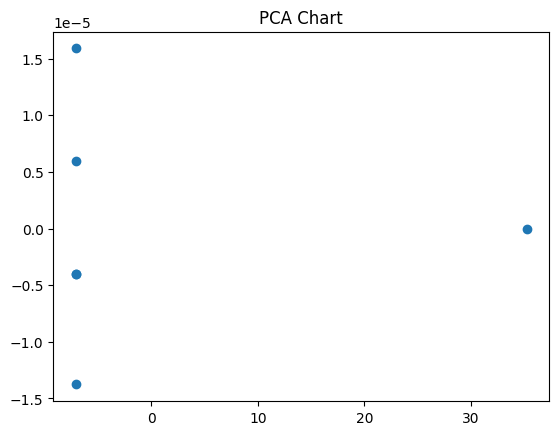

In [60]:
#new graph
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title("PCA Chart")
plt.xlabel('PC1-{0}%'.format(perc(0)))
plt.ylabel('PC2-{0}%'.format(perc(1)))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
    plt.show()